In [4]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans

In [23]:
Data = pd.read_csv(r'C:\Users\Milin Desai\Desktop\DePaul Winter\segmentation_data\segmentation_data.txt', header=None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [72]:
Data_class = pd.read_csv(r'C:\Users\Milin Desai\Desktop\DePaul Winter\segmentation_data\segmentation_classes.txt', header=None, delimiter="\t")
Data_class

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
2095,CEMENT,3
2096,CEMENT,3
2097,CEMENT,3
2098,CEMENT,3


In [14]:
Data_name = pd.read_csv(r'C:\Users\Milin Desai\Desktop\DePaul Winter\segmentation_data\segmentation_names.txt', header=None, delimiter="\t")
Data_name

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


### Q-1 A)

In [24]:
Data = np.array(Data)
Data

array([[110.        , 189.        ,   9.        , ...,  18.666668  ,
          0.50813884,   1.9108642 ],
       [ 86.        , 187.        ,   9.        , ...,  19.222221  ,
          0.46332908,   1.9414649 ],
       [225.        , 244.        ,   9.        , ...,  17.11111   ,
          0.48014903,   1.9879022 ],
       ...,
       [128.        , 161.        ,   9.        , ...,  10.888889  ,
          0.5409177 ,  -1.9963073 ],
       [150.        , 158.        ,   9.        , ...,  12.222222  ,
          0.50308645,  -1.9434487 ],
       [124.        , 162.        ,   9.        , ...,  14.555555  ,
          0.4799313 ,  -2.0293121 ]])

In [17]:
Data_name = np.array(Data_name)
Data_name

array([['REGION-CENTROID-COL'],
       ['REGION-CENTROID-ROW'],
       ['REGION-PIXEL-COUNT'],
       ['SHORT-LINE-DENSITY-5'],
       ['SHORT-LINE-DENSITY-2'],
       ['VEDGE-MEAN'],
       ['VEDGE-SD'],
       ['HEDGE-MEAN'],
       ['HEDGE-SD'],
       ['INTENSITY-MEAN'],
       ['RAWRED-MEAN'],
       ['RAWBLUE-MEAN'],
       ['RAWGREEN-MEAN'],
       ['EXRED-MEAN'],
       ['EXBLUE-MEAN'],
       ['EXGREEN-MEAN'],
       ['VALUE-MEAN'],
       ['SATURATION-MEAN'],
       ['HUE-MEAN']], dtype=object)

In [18]:
Data_class = np.array(Data_class)
Data_class

array([['GRASS', 0],
       ['GRASS', 0],
       ['GRASS', 0],
       ...,
       ['CEMENT', 3],
       ['CEMENT', 3],
       ['CEMENT', 3]], dtype=object)

In [20]:
from sklearn import preprocessing

In [21]:
scaling = preprocessing.MinMaxScaler()

In [34]:
Data_1 = scaling.fit_transform(Data) 

In [35]:
Data_1

array([[0.43, 0.74, 0.  , ..., 0.12, 0.51, 0.83],
       [0.34, 0.73, 0.  , ..., 0.13, 0.46, 0.84],
       [0.89, 0.97, 0.  , ..., 0.11, 0.48, 0.84],
       ...,
       [0.5 , 0.62, 0.  , ..., 0.07, 0.54, 0.18],
       [0.59, 0.61, 0.  , ..., 0.08, 0.5 , 0.18],
       [0.49, 0.63, 0.  , ..., 0.1 , 0.48, 0.17]])

### Q-1 B) Clustering Data

In [36]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)

In [37]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization

In [38]:
kmeans.fit(Data_1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 385.14488125237534
start iteration
done sorting
end inner loop
Iteration 1, inertia 360.6303471838679
start iteration
done sorting
end inner loop
Iteration 2, inertia 355.25020376798375
start iteration
done sorting
end inner loop
Iteration 3, inertia 352.15638775028094
start iteration
done sorting
end inner loop
Iteration 4, inertia 351.0420522739411
start iteration
done sorting
end inner loop
Iteration 5, inertia 350.423234394236
start iteration
done sorting
end inner loop
Iteration 6, inertia 350.1446625128219
start iteration
done sorting
end inner loop
Iteration 7, inertia 350.03476808677726
start iteration
done sorting
end inner loop
Iteration 8, inertia 350.0128073878835
start iteration
done sorting
end inner loop
Iteration 9, inertia 350.0115747924538
start iteration
done sorting
end inner loop
Iteration 10, inertia 350.0115747924538
center shift 0.000000e+00 within tolerance 4.150157e-06
Ini

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [39]:
clusters = kmeans.predict(Data_1)

In [40]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,6
2096,2
2097,1
2098,1


In [42]:
pd.options.display.float_format='{:,.2f}'.format

data_centroids_ = pd.DataFrame(kmeans.cluster_centers_, columns=Data_name)
data_centroids_

,"(REGION-CENTROID-COL,)","(REGION-CENTROID-ROW,)","(REGION-PIXEL-COUNT,)","(SHORT-LINE-DENSITY-5,)","(SHORT-LINE-DENSITY-2,)","(VEDGE-MEAN,)","(VEDGE-SD,)","(HEDGE-MEAN,)","(HEDGE-SD,)","(INTENSITY-MEAN,)","(RAWRED-MEAN,)","(RAWBLUE-MEAN,)","(RAWGREEN-MEAN,)","(EXRED-MEAN,)","(EXBLUE-MEAN,)","(EXGREEN-MEAN,)","(VALUE-MEAN,)","(SATURATION-MEAN,)","(HUE-MEAN,)"
0,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16
1,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.03,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24
2,0.25,0.39,0.00,0.08,0.02,0.08,0.00,0.06,0.01,0.15,0.14,0.18,0.12,0.72,0.34,0.35,0.18,0.41,0.20
3,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
4,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
5,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.26,0.59,0.45,0.31,0.35,0.30,0.16
6,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18


In [43]:
from sklearn import metrics

In [44]:
silhouettes = metrics.silhouette_samples(Data, clusters)​silhouettes = metrics.silhouette_samples(Data, clusters)
print(silhouettes[:20])
print(silhouettes[:20])

[0.57 0.56 0.47 0.5  0.57 0.56 0.54 0.41 0.52 0.47 0.49 0.49 0.58 0.56 0.38 0.53 0.55 0.42 0.42 0.4 ]


In [45]:
print(silhouettes.mean())

0.33207429088941987


In [46]:

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

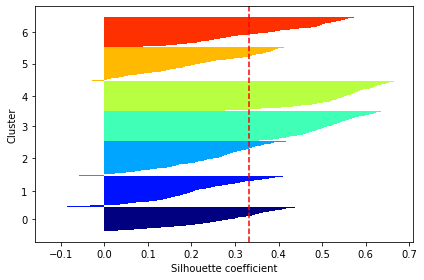

In [47]:
plot_silhouettes(Data, clusters)

In [48]:
Data_kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1, n_init=5) # initialization
Data_kmeans.fit(Data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 404.3113031196424
start iteration
done sorting
end inner loop
Iteration 1, inertia 379.4451036978588
start iteration
done sorting
end inner loop
Iteration 2, inertia 375.92850701082494
start iteration
done sorting
end inner loop
Iteration 3, inertia 374.8527353736211
start iteration
done sorting
end inner loop
Iteration 4, inertia 374.64101730349523
start iteration
done sorting
end inner loop
Iteration 5, inertia 374.5853903162507
start iteration
done sorting
end inner loop
Iteration 6, inertia 374.5585665349903
start iteration
done sorting
end inner loop
Iteration 7, inertia 374.53793237024365
start iteration
done sorting
end inner loop
Iteration 8, inertia 374.5178307716084
start iteration
done sorting
end inner loop
Iteration 9, inertia 374.51453424870346
start iteration
done sorting
end inner loop
Iteration 10, inertia 374.51453424870346
center shift 0.000000e+00 within tolerance 4.150157e-06
I

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [56]:
Pred = Data_kmeans.predict(Data)

In [58]:
from sklearn.metrics import completeness_score, homogeneity_score

In [73]:
Data_class_2 = Data_class[1]
Data_class_2
#Data_class = np.array(Data_class)
#Data_class.shape

0       0
1       0
2       0
3       0
4       0
       ..
2095    3
2096    3
2097    3
2098    3
2099    3
Name: 1, Length: 2100, dtype: int64

In [74]:
print(completeness_score(Data_class_2,clusters))

0.6117374684331665


In [75]:
print(homogeneity_score(Data_class_2,clusters))

0.6100499914689614


### Q-1 C)

In [81]:
from sklearn import decomposition 
analysis = decomposition.PCA(n_components=2)
RDS = analysis.fit(Data).transform(Data)
print(analysis.explained_variance_ratio_)

[0.61 0.13]


In [79]:
from sklearn import decomposition 
analysis = decomposition.PCA(n_components=3)
RDS = analysis.fit(Data).transform(Data)
print(analysis.explained_variance_ratio_)

[0.61 0.13 0.1 ]


In [82]:
from sklearn import decomposition 
analysis = decomposition.PCA(n_components=4)
RDS = analysis.fit(Data).transform(Data)
print(analysis.explained_variance_ratio_)

[0.61 0.13 0.1  0.05]


In [83]:
RDS

array([[-0.69,  0.53,  0.25, -0.2 ],
       [-0.67,  0.51,  0.34, -0.17],
       [-0.71,  0.77, -0.16, -0.01],
       ...,
       [-0.51, -0.13, -0.08,  0.1 ],
       [-0.48, -0.09, -0.16,  0.11],
       [-0.44, -0.11, -0.05,  0.15]])

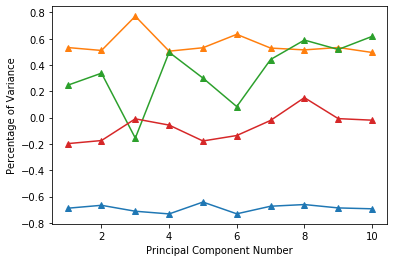

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), RDS[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization
kmeans.fit(RDS)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 204.36614208955018
start iteration
done sorting
end inner loop
Iteration 1, inertia 179.97887340017286
start iteration
done sorting
end inner loop
Iteration 2, inertia 177.06027836422155
start iteration
done sorting
end inner loop
Iteration 3, inertia 176.8259014013768
start iteration
done sorting
end inner loop
Iteration 4, inertia 176.79440924016723
start iteration
done sorting
end inner loop
Iteration 5, inertia 176.79059105625646
center shift 2.038162e-03 within tolerance 1.746170e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 195.41767088345296
start iteration
done sorting
end inner loop
Iteration 1, inertia 179.77927819315204
start iteration
done sorting
end inner loop
Iteration 2, inertia 177.1210373239736
start iteration
done sorting
end inner loop
Iteration 3, inertia 176.82379465437975
start iteration
done sorting
end inner loop
Iteration 4, i

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [91]:
clusters = kmeans.predict(RDS)
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,4
2096,4
2097,0
2098,0


In [94]:
print(completeness_score(Data_class_2,clusters))

0.5982560579412508


In [95]:
print(homogeneity_score(Data_class_2,clusters))

0.5969504587800466


In [96]:
silhouettes = metrics.silhouette_samples(Data, clusters)
print(silhouettes[:20])
print(silhouettes.mean())

[0.55 0.53 0.46 0.46 0.54 0.55 0.51 0.39 0.49 0.44 0.46 0.46 0.57 0.53 0.37 0.5  0.54 0.39 0.42 0.4 ]
0.32739241171986255


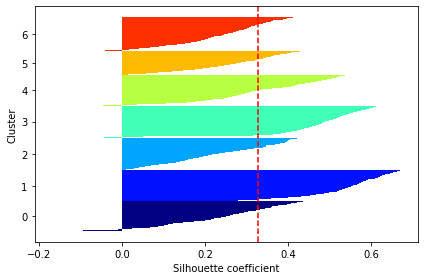

In [97]:
plot_silhouettes(Data, clusters)